In [1]:
import os
import random
import warnings
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import torch
import matplotlib.pyplot as plt
import re
import sys

random.seed(123)
torch.manual_seed(123)
np.random.seed(123)

In [2]:
sys.path.insert(1, '../../')
from CoreSNN import *
from ExplanationCreationGeneral import *
from ExplanationEvaluationNEW import *

In [4]:
warnings.filterwarnings('ignore', 'y_pred contains classes not in y_true')

In [9]:
# adl_data = load_obj('../../dataset_max.pkl')
# A_testset_t = load_obj('../../quantitative_test_t_A_final.pkl')
# B_testset_t = load_obj('../../quantitative_test_t_B_final.pkl')
# A_y_true = adl_data['y_test_A'][:, A_testset_t]
# B_y_true = adl_data['y_test_B'][:, B_testset_t]

dataset = load_obj('../../Synthetic_dataset/syn_data.pkl')
testset_t = load_obj('../../Synthetic_dataset/expl_syn_testset.pkl')
y_true = dataset['y_test'][:, testset_t]

# Attribution sufficiency

## Read result data

In [73]:
os.getcwd()

'C:\\Users\\Elisa\\Documents\\Master\\Thesis\\Publication\\Unnormalized_weights\\nocw'

In [74]:
def get_thetas(dataset, tsa_variant):
    d = os.getcwd() + '\\completeness\\{}\\{}'.format(dataset, tsa_variant)
    filenames = next(os.walk(d))[2][:8]
    all_thetas = [float(theta[21:-4]) for theta in filenames]
    all_thetas[-1] = 0
    return sorted(all_thetas)


def get_scores(modelname, tsa_variant, dataset):
    thetas = get_thetas(dataset, tsa_variant)
    _, y_pred_0, y_pred_p_0 = load_obj(os.getcwd() + '\\completeness\\{}\\{}\\{}_sufficiency_theta{}.pkl'.format(dataset, tsa_variant, modelname, thetas[0]))
    _, y_pred_5, y_pred_p_5 = load_obj(os.getcwd() + '\\completeness\\{}\\{}\\{}_sufficiency_theta{}.pkl'.format(dataset, tsa_variant, modelname, thetas[1]))
    _, y_pred_10, y_pred_p_10 = load_obj(os.getcwd() + '\\completeness\\{}\\{}\\{}_sufficiency_theta{}.pkl'.format(dataset, tsa_variant, modelname, thetas[2]))
    _, y_pred_15, y_pred_p_15 = load_obj(os.getcwd() + '\\completeness\\{}\\{}\\{}_sufficiency_theta{}.pkl'.format(dataset, tsa_variant, modelname, thetas[3]))
    _, y_pred_20, y_pred_p_20 = load_obj(os.getcwd() + '\\completeness\\{}\\{}\\{}_sufficiency_theta{}.pkl'.format(dataset, tsa_variant, modelname, thetas[4]))
    _, y_pred_25, y_pred_p_25 = load_obj(os.getcwd() + '\\completeness\\{}\\{}\\{}_sufficiency_theta{}.pkl'.format(dataset, tsa_variant, modelname, thetas[5]))
    _, y_pred_50, y_pred_p_50 = load_obj(os.getcwd() + '\\completeness\\{}\\{}\\{}_sufficiency_theta{}.pkl'.format(dataset, tsa_variant, modelname, thetas[6]))
    _, y_pred_75, y_pred_p_75 = load_obj(os.getcwd() + '\\completeness\\{}\\{}\\{}_sufficiency_theta{}.pkl'.format(dataset, tsa_variant, modelname, thetas[7]))

    scores = [balanced_accuracy_score(y_pred_0, y_pred_p_0),
                  balanced_accuracy_score(y_pred_5, y_pred_p_5),
                  balanced_accuracy_score(y_pred_10, y_pred_p_10),
                  balanced_accuracy_score(y_pred_15, y_pred_p_15),
                  balanced_accuracy_score(y_pred_20, y_pred_p_20),
                  balanced_accuracy_score(y_pred_25, y_pred_p_25),
                  balanced_accuracy_score(y_pred_50, y_pred_p_50),
                  balanced_accuracy_score(y_pred_75, y_pred_p_75)]
    return scores

In [75]:
scores_one_s = get_scores('one', 's', 'syn')
scores_two_s = get_scores('two', 's', 'syn')
scores_three_s = get_scores('three', 's', 'syn')

scores_one_ns2 = get_scores('one', 'ns2', 'syn')
scores_two_ns2 = get_scores('two', 'ns2', 'syn')
scores_three_ns2 = get_scores('three', 'ns2', 'syn')


## Visualize results

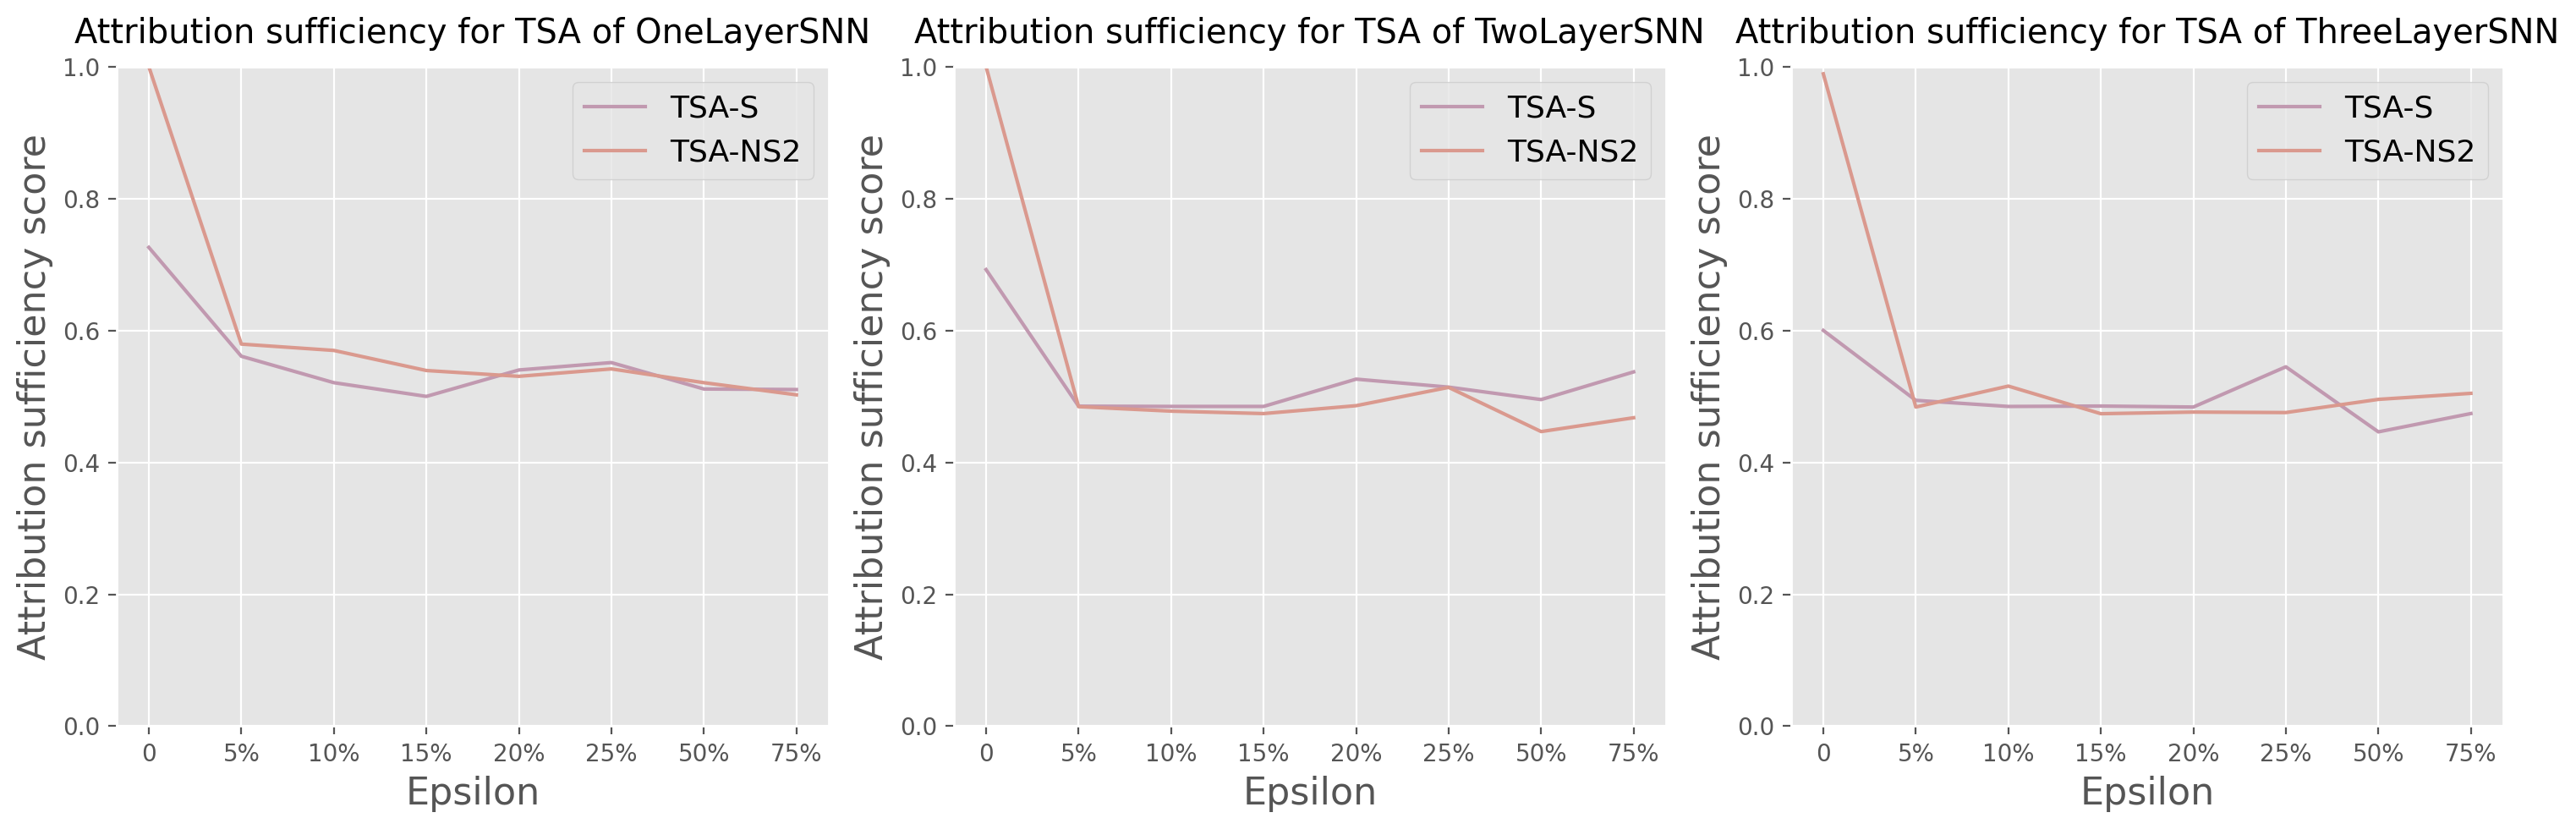

In [76]:
fig = plt.figure(tight_layout=True, frameon=False, figsize=(15,5),dpi=200)
gs = gridspec.GridSpec(1,3)

ax1 = fig.add_subplot(gs[0,0])
ax1.plot(scores_one_s, color = (194/256, 154/256, 177/256))
ax1.plot(scores_one_ns2, color = (219/256, 154/256, 143/256))
ax1.set_ylim(ymin = 0, ymax=1)
ax1.set_ylabel('Attribution sufficiency score', fontdict={'fontsize': 16})
ax1.set_xticks(range(8))
ax1.set_xticklabels([0, '5%', '10%', '15%', '20%', '25%', '50%', '75%'])
ax1.set_xlabel('Epsilon', fontdict={'fontsize': 16})
ax1.set_title('Attribution sufficiency for TSA of OneLayerSNN', pad=10)
ax1.legend(['TSA-S','TSA-NS2'], prop={'size':13})

ax2 = fig.add_subplot(gs[0,1])
ax2.plot(scores_two_s,  color= (194/256, 154/256, 177/256))
ax2.plot(scores_two_ns2,  color= (219/256, 154/256, 143/256))
ax2.set_ylim(ymin = 0, ymax=1)
ax2.set_ylabel('Attribution sufficiency score', fontdict={'fontsize': 16})
ax2.set_xticks(range(8))
ax2.set_xticklabels([0, '5%', '10%', '15%', '20%', '25%', '50%', '75%'])
ax2.set_xlabel('Epsilon', fontdict={'fontsize': 16})
ax2.set_title('Attribution sufficiency for TSA of TwoLayerSNN', pad=10)
ax2.legend(['TSA-S','TSA-NS2'], prop={'size':13})

ax3 = fig.add_subplot(gs[0,2])
ax3.plot(scores_three_s, color= (194/256, 154/256, 177/256))
ax3.plot(scores_three_ns2, color= (219/256, 154/256, 143/256))
ax3.set_ylim(ymin = 0, ymax=1)
ax3.set_ylabel('Attribution sufficiency score', fontdict={'fontsize': 16})
ax3.set_xticks(range(8))
ax3.set_xticklabels([0, '5%', '10%', '15%', '20%', '25%', '50%', '75%'])
ax3.set_xlabel('Epsilon', fontdict={'fontsize': 16})
ax3.set_title('Attribution sufficiency for TSA of ThreeLayerSNN', pad=10)
ax3.legend(['TSA-S', 'TSA-NS2'], prop={'size':13})

In [77]:
n=100
CIs_one_s = print([conf_interval(score, n) for score in scores_one_s][0])
CIs_two_s = print([conf_interval(score, n) for score in scores_two_s][0])
CIs_three_s = print([conf_interval(score, n) for score in scores_three_s][0])
# CIs_overall_s = print([conf_interval(score, n) for score in overall_sufficiency_s][0])
CIs_one = print([conf_interval(score, n) for score in scores_one_ns2][0])
CIs_two = print([conf_interval(score, n) for score in scores_two_ns2][0])
CIs_three = print([conf_interval(score, n) for score in scores_three_ns2][0])
# CIs_overall = print([conf_interval(score, n) for score in overall_sufficiency_ns2][0])

0.08742157728247765
0.09046301899777671
0.0960174200262898
0.0
0.0
0.020323052551926277


In [78]:
df_sufficiency = pd.DataFrame([scores_one_s, scores_two_s, scores_three_s, 
                               scores_one_ns2, scores_two_ns2, scores_three_ns2])
df_sufficiency.columns = [0, '5%', '10%', '15%', '20%', '25%', '50%', '75%']
df_sufficiency

,0,5%,10%,15%,20%,25%,50%,75%
0,0.725962,0.560897,0.520833,0.500000,0.540064,0.551282,0.511218,0.510417
1,0.692290,0.485174,0.484817,0.484817,0.526181,0.514077,0.495202,0.537160
2,0.600064,0.494026,0.484767,0.485378,0.483897,0.544895,0.446248,0.474026
3,1.000000,0.579327,0.569712,0.539263,0.530449,0.541667,0.520833,0.502404
4,1.000000,0.484461,0.477663,0.473956,0.485943,0.513692,0.446684,0.467663
5,0.989130,0.483897,0.515636,0.473768,0.476248,0.475507,0.495507,0.504638


In [72]:
sorted(get_thetas('syn', 's'))

[0,
 0.010666202753782272,
 0.021332405507564545,
 0.03199860826134682,
 0.04266481101512909,
 0.05333101376891136,
 0.10666202753782272,
 0.15999304130673409]

# Faithfulness

## Reading the data

In [48]:
y_preds_p_one_s = load_obj(os.getcwd()+'\\correctness\\{}\\{}\\y_preds_perturbed_{}.pkl'.format('syn', 's', 'onelayer'))
y_preds_p_two_s = load_obj(os.getcwd()+'\\correctness\\{}\\{}\\y_preds_perturbed_{}.pkl'.format('syn', 's', 'twolayer'))
y_preds_p_three_s = load_obj(os.getcwd()+'\\correctness\\{}\\{}\\y_preds_perturbed_{}.pkl'.format('syn', 's', 'threelayer'))

y_preds_p_one_ns2 = load_obj(os.getcwd()+'\\correctness\\{}\\{}\\y_preds_perturbed_{}.pkl'.format('syn', 'ns2', 'onelayer'))
y_preds_p_two_ns2 = load_obj(os.getcwd()+'\\correctness\\{}\\{}\\y_preds_perturbed_{}.pkl'.format('syn', 'ns2', 'twolayer'))
y_preds_p_three_ns2 = load_obj(os.getcwd()+'\\correctness\\{}\\{}\\y_preds_perturbed_{}.pkl'.format('syn', 'ns2', 'threelayer'))


In [50]:
# some postprocessing since there seem to be explanations that are all = 0 so that there is no explanation?
for i, y_pred in enumerate(y_preds_p_one_s):
    if len(y_pred) == 0:
        y_preds_p_one_s[i].append(y_true[:, i][0])
for i, y_pred in enumerate(y_preds_p_two_s):
    if len(y_pred) == 0:
        y_preds_p_two_s[i].append(y_true[:, i][0])
for i, y_pred in enumerate(y_preds_p_three_s):
    if len(y_pred) == 0:
        y_preds_p_three_s[i].append(y_true[:, i][0])
        
for i, y_pred in enumerate(y_preds_p_one_ns2):
    if len(y_pred) == 0:
        y_preds_p_one_ns2[i].append(y_true[:, i][0])
for i, y_pred in enumerate(y_preds_p_two_ns2):
    if len(y_pred) == 0:
        y_preds_p_two_ns2[i].append(y_true[:, i][0])
for i, y_pred in enumerate(y_preds_p_three_ns2):
    if len(y_pred) == 0:
        y_preds_p_three_ns2[i].append(y_true[:, i][0])

## Normalization and combination of the results per model

In [51]:
def get_perf_curve_yhat(y_preds_p):
    y_hat = [pred[0] for pred in y_preds_p] # get the first prediction of the model without perturbations yet
    perf = []
    for i in range(max([len(y_pred) for y_pred in y_preds_p])):
        y_pred_p = [pred[i] if i<len(pred) else pred[-1] for pred in y_preds_p]
        perf.append(balanced_accuracy_score(y_hat, y_pred_p))
    return perf

def get_perf_curve_ytrue(y_preds_p):
    perf = []
    for i in range(max([len(y_pred) for y_pred in y_preds_p])):
        y_pred_p = [pred[i] if i<len(pred) else pred[-1] for pred in y_preds_p]
        perf.append(balanced_accuracy_score(y_true[0], y_pred_p))
    return perf

In [52]:
perf_one_yhat_s = get_perf_curve_yhat(y_preds_p_one_s)
perf_one_ytrue_s = get_perf_curve_ytrue(y_preds_p_one_s)
perf_one_yhat_ns2 = get_perf_curve_yhat(y_preds_p_one_ns2)
perf_one_ytrue_ns2 = get_perf_curve_ytrue(y_preds_p_one_ns2)

perf_two_yhat_s = get_perf_curve_yhat(y_preds_p_two_s)
perf_two_ytrue_s = get_perf_curve_ytrue(y_preds_p_two_s)
perf_two_yhat_ns2 = get_perf_curve_yhat(y_preds_p_two_ns2)
perf_two_ytrue_ns2 = get_perf_curve_ytrue(y_preds_p_two_ns2)

perf_three_yhat_s = get_perf_curve_yhat(y_preds_p_three_s)
perf_three_ytrue_s = get_perf_curve_ytrue(y_preds_p_three_s)
perf_three_yhat_ns2 = get_perf_curve_yhat(y_preds_p_three_ns2)
perf_three_ytrue_ns2 = get_perf_curve_ytrue(y_preds_p_three_ns2)


In [53]:
ess_yhat_one_s = metrics.auc(range(len(perf_one_yhat_s)), perf_one_yhat_s)
norm_ess_yhat_one_s = ess_yhat_one_s/len(perf_one_yhat_s)
ess_yhat_one_ns2 = metrics.auc(range(len(perf_one_yhat_ns2)), perf_one_yhat_ns2)
norm_ess_yhat_one_ns2 = ess_yhat_one_ns2/len(perf_one_yhat_ns2)

ess_yhat_two_s = metrics.auc(range(len(perf_two_yhat_s)), perf_two_yhat_s)
norm_ess_yhat_two_s = ess_yhat_two_s/len(perf_two_yhat_s)
ess_yhat_two_ns2 = metrics.auc(range(len(perf_two_yhat_ns2)), perf_two_yhat_ns2)
norm_ess_yhat_two_ns2 = ess_yhat_two_ns2/len(perf_two_yhat_ns2)

ess_yhat_three_s = metrics.auc(range(len(perf_three_yhat_s)), perf_three_yhat_s)
norm_ess_yhat_three_s = ess_yhat_three_s/len(perf_three_yhat_s)
ess_yhat_three_ns2 = metrics.auc(range(len(perf_three_yhat_ns2)), perf_three_yhat_ns2)
norm_ess_yhat_three_ns2 = ess_yhat_three_ns2/len(perf_three_yhat_ns2)

print('ESS for TSA-S Explanations from OneLayerSNN: ', norm_ess_yhat_one_s, ' +- ', conf_interval(norm_ess_yhat_one_s, 100))
print('ESS for TSA-NS2 Explanations from OneLayerSNN: ', norm_ess_yhat_one_ns2, ' +- ', conf_interval(norm_ess_yhat_one_ns2, 100))

print('ESS for TSA-S Explanations from TwoLayerSNN: ', norm_ess_yhat_two_s, ' +- ', conf_interval(norm_ess_yhat_two_s, 100))
print('ESS for TSA-NS2 Explanations from TwoLayerSNN: ', norm_ess_yhat_two_ns2, ' +- ', conf_interval(norm_ess_yhat_two_ns2, 100))

print('ESS for TSA-S Explanations from ThreeLayerSNN: ', norm_ess_yhat_three_s, ' +- ', conf_interval(norm_ess_yhat_three_s, 100))
print('ESS for TSA-NS2 Explanations from ThreeLayerSNN: ', norm_ess_yhat_three_ns2, ' +- ', conf_interval(norm_ess_yhat_three_ns2, 100))


ESS for TSA-S Explanations from OneLayerSNN:  0.40421340811965817  +-  0.09618487648998406
ESS for TSA-NS2 Explanations from OneLayerSNN:  0.1151737516869096  +-  0.06256937646112339
ESS for TSA-S Explanations from TwoLayerSNN:  0.8088522197897198  +-  0.07706821347358625
ESS for TSA-NS2 Explanations from TwoLayerSNN:  0.4259088305963306  +-  0.09691808559215095
ESS for TSA-S Explanations from ThreeLayerSNN:  0.812726601766457  +-  0.07646564469739825
ESS for TSA-NS2 Explanations from ThreeLayerSNN:  0.5197351710742567  +-  0.09792363275756717


In [33]:
# conf_interval((norm_ess_yhat_one_ns2 + norm_ess_yhat_two_ns2 + norm_ess_yhat_three_ns2)/3, 180)

Text(0.5, 1.0, 'Balanced accuracy of ThreeLayerSNN \n with flipped feature segments')

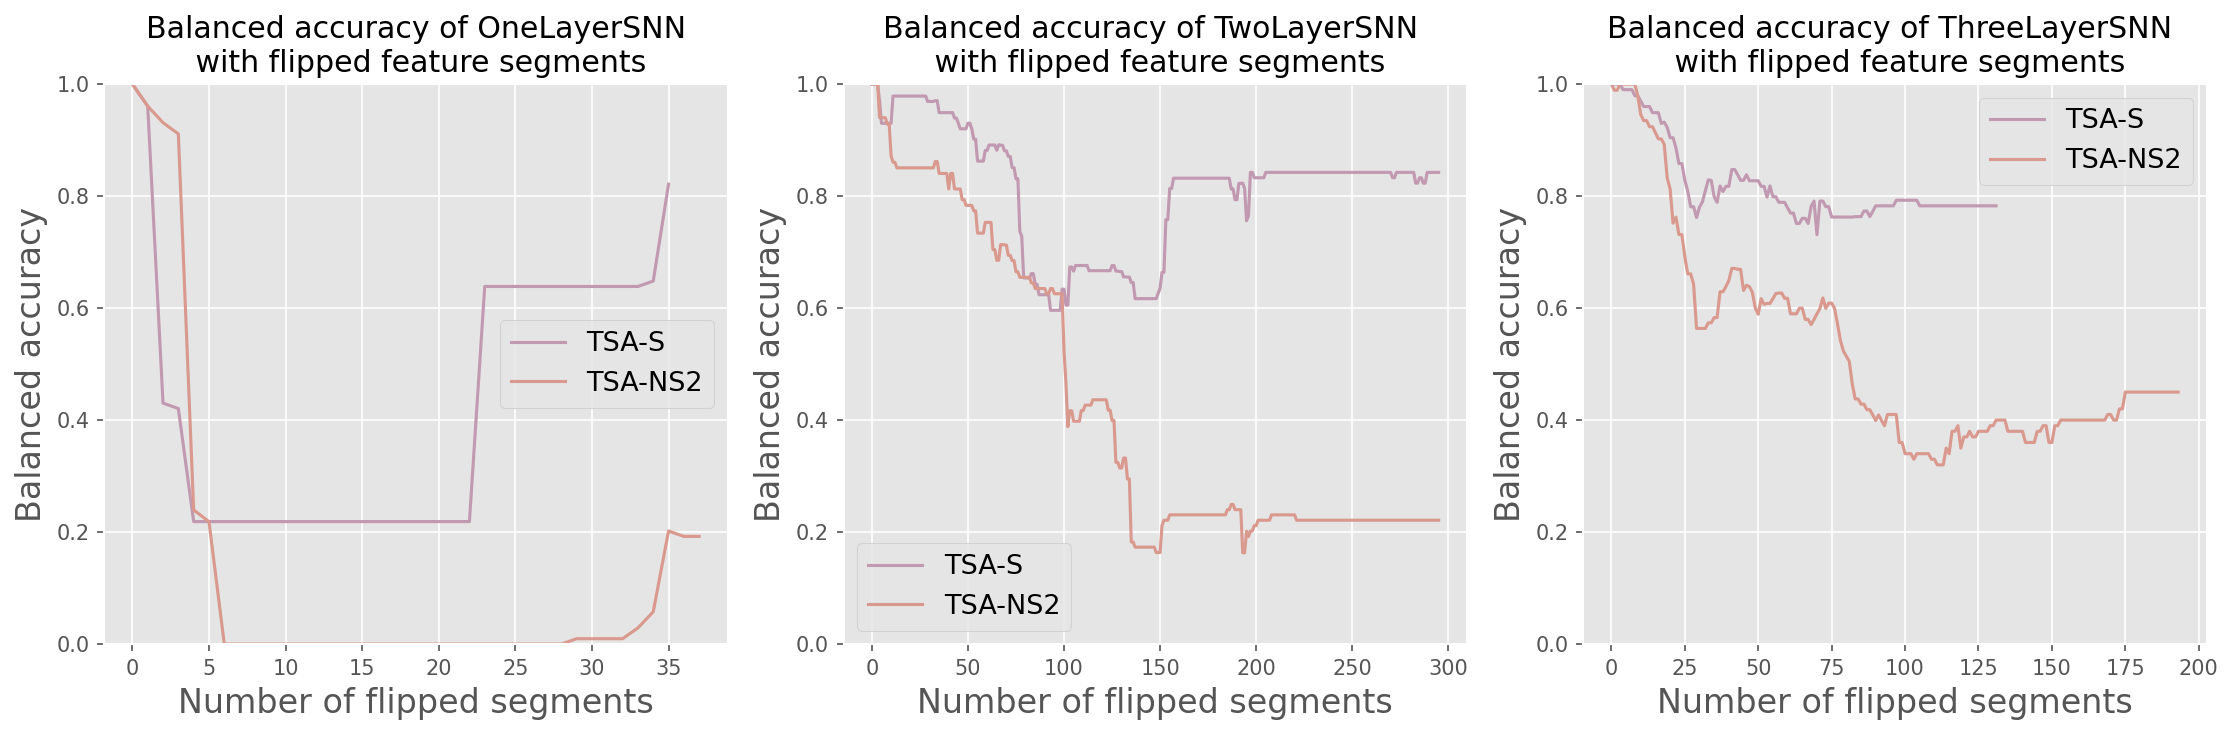

In [54]:
fig = plt.figure(tight_layout=True, dpi=150, frameon=False, figsize=(15,5))
gs = gridspec.GridSpec(1,3)

ax1 = fig.add_subplot(gs[0,0])
ax1.plot(perf_one_yhat_s, color=(194/256, 154/256, 177/256))
ax1.plot(perf_one_yhat_ns2, color=(219/256, 154/256, 143/256))
ax1.set_ylim(0,1)
ax1.set_ylabel('Balanced accuracy', fontdict={'size': 16})
ax1.set_xlabel('Number of flipped segments', fontdict={'size': 16})
ax1.legend(['TSA-S', 'TSA-NS2'], prop={'size':13})
ax1.set_title('Balanced accuracy of OneLayerSNN\n with flipped feature segments')

ax2 = fig.add_subplot(gs[0,1])
ax2.plot(perf_two_yhat_s, color=(194/256, 154/256, 177/256))
ax2.plot(perf_two_yhat_ns2, color=(219/256, 154/256, 143/256))
ax2.set_ylim(0,1)
ax2.set_ylabel('Balanced accuracy', fontdict={'size': 16})
ax2.set_xlabel('Number of flipped segments', fontdict={'size': 16})
ax2.legend(['TSA-S', 'TSA-NS2'], prop={'size':13})
ax2.set_title('Balanced accuracy of TwoLayerSNN \n with flipped feature segments')

ax3 = fig.add_subplot(gs[0,2])
ax3.plot(perf_three_yhat_s, color=(194/256, 154/256, 177/256))
ax3.plot(perf_three_yhat_ns2, color=(219/256, 154/256, 143/256))
ax3.set_ylim(0,1)
ax3.set_ylabel('Balanced accuracy', fontdict={'size': 16})
ax3.set_xlabel('Number of flipped segments', fontdict={'size': 16})
ax3.legend(['TSA-S', 'TSA-NS2'], prop={'size':13})
ax3.set_title('Balanced accuracy of ThreeLayerSNN \n with flipped feature segments')



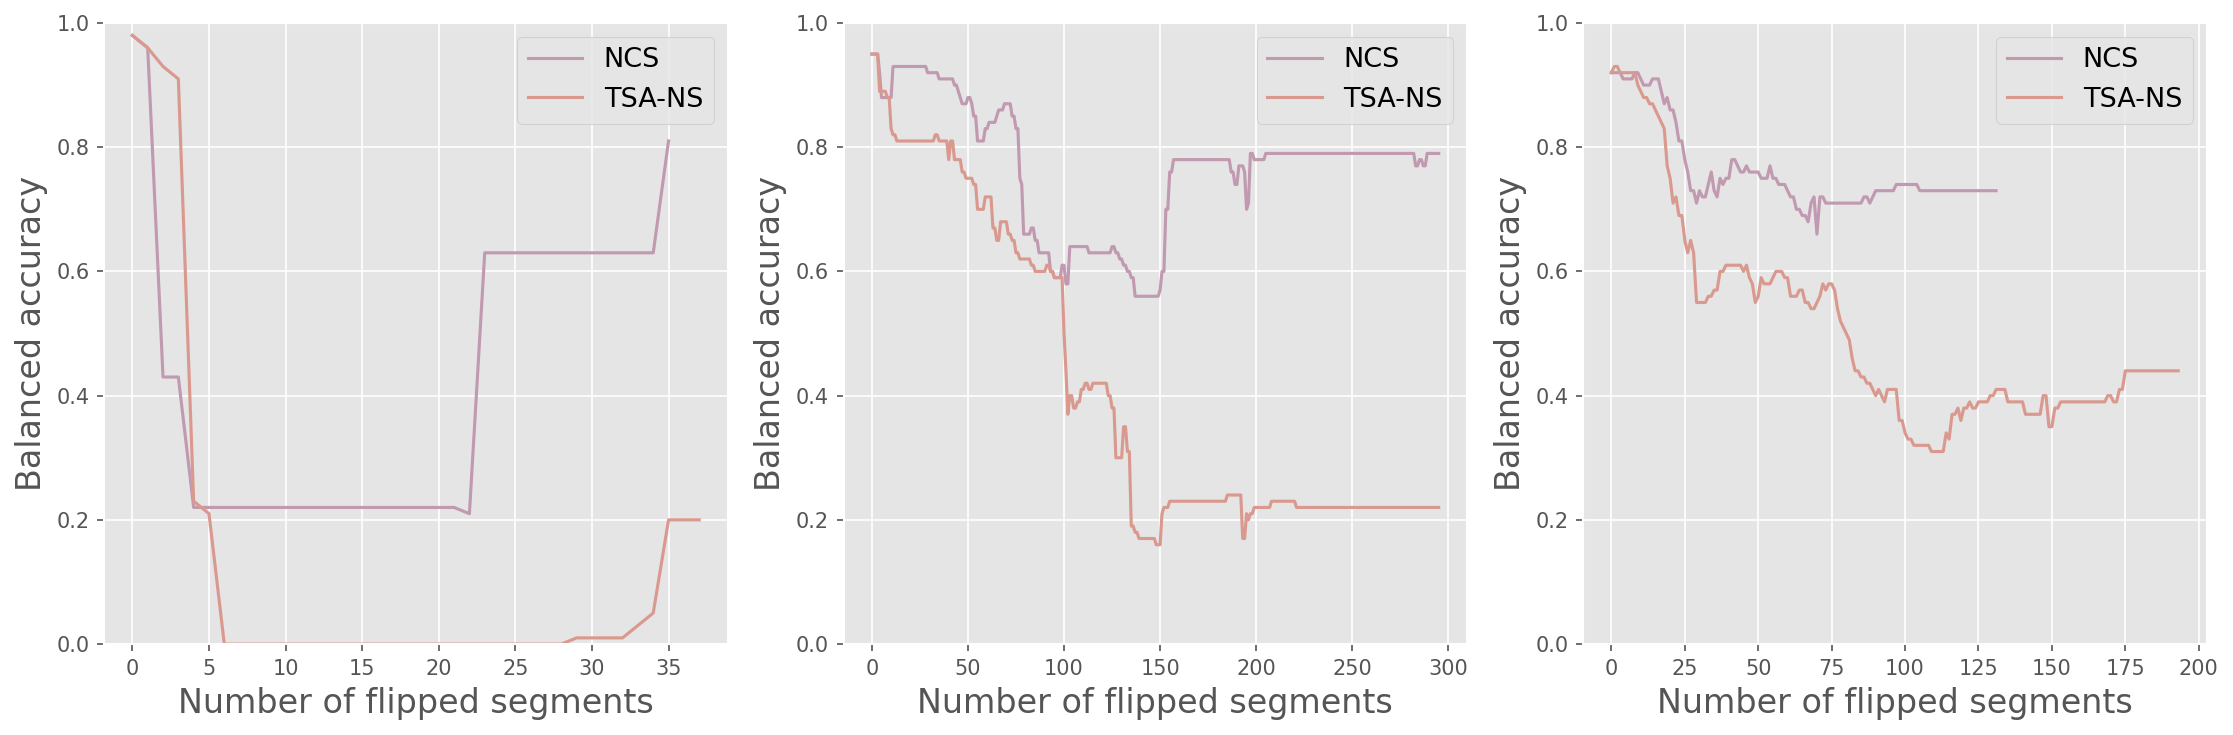

In [55]:
fig = plt.figure(tight_layout=True, dpi=150, frameon=False, figsize=(15,5))
gs = gridspec.GridSpec(1,3)

ax1 = fig.add_subplot(gs[0,0])
ax1.plot(perf_one_ytrue_s, color=(194/256, 154/256, 177/256))
ax1.plot(perf_one_ytrue_ns2, color=(219/256, 154/256, 143/256))
ax1.set_ylim(0,1)
ax1.set_ylabel('Balanced accuracy', fontdict={'size': 16})
ax1.set_xlabel('Number of flipped segments', fontdict={'size': 16})
ax1.legend(['NCS', 'TSA-NS'], prop={'size':13})

ax2 = fig.add_subplot(gs[0,1])
ax2.plot(perf_two_ytrue_s, color=(194/256, 154/256, 177/256))
ax2.plot(perf_two_ytrue_ns2, color=(219/256, 154/256, 143/256))
ax2.set_ylim(0,1)
ax2.set_ylabel('Balanced accuracy', fontdict={'size': 16})
ax2.set_xlabel('Number of flipped segments', fontdict={'size': 16})
ax2.legend(['NCS', 'TSA-NS'], prop={'size':13})

ax3 = fig.add_subplot(gs[0,2])
ax3.plot(perf_three_ytrue_s, color=(194/256, 154/256, 177/256))
ax3.plot(perf_three_ytrue_ns2, color=(219/256, 154/256, 143/256))
ax3.set_ylim(0,1)
ax3.set_ylabel('Balanced accuracy', fontdict={'size': 16})
ax3.set_xlabel('Number of flipped segments', fontdict={'size': 16})
ax3.legend(['NCS', 'TSA-NS'], prop={'size':13})


# Sensitivity

### Read results

In [56]:
def get_sens_score(modelname, tsa_variant):
    score = load_obj(os.getcwd()+'\\continuity\\{}\\{}\\max_sensitivity_{}.pkl'.format('syn', tsa_variant, modelname))
    return score

In [58]:
max_sensitivity_one_s = get_sens_score('one', 's')
max_sensitivity_two_s = get_sens_score('two', 's')
max_sensitivity_three_s = get_sens_score('three', 's')

max_sensitivity_one_ns2 = get_sens_score('one', 'ns2')
max_sensitivity_two_ns2 = get_sens_score('two', 'ns2')
max_sensitivity_three_ns2 = get_sens_score('three', 'ns2')

### Analyze

In [59]:
sensitivities_s = [max_sensitivity_one_s, max_sensitivity_two_s, max_sensitivity_three_s]
sensitivities_ns2 = [max_sensitivity_one_ns2, max_sensitivity_two_ns2, max_sensitivity_three_ns2]
df_sensitivity = pd.DataFrame([sensitivities_s, sensitivities_ns2]).transpose()

In [60]:
df_sensitivity

,0,1
0,0.28181472,0.33370826
1,0.020836689,0.022900622
2,0.0006523102,0.0016767944


# Compactness

### Load explanations. Compactness is then the sum of absolute attribution values.

In [64]:
def load_explanations(explanation_type, model):
    return load_obj(os.getcwd() + '\\expl_{}_syn_nocw_{}.pkl'.format(model, explanation_type))

In [65]:
def compute_compactness(model, explanation_type):
    explanations = {**load_explanations(explanation_type, model)}
    sum_absolute_attribution = 0
    for key in explanations.keys():
        sum_absolute_attribution += torch.sum(torch.abs(explanations[key][0]))
    return sum_absolute_attribution/100

In [66]:
models = ['one', 'two', 'three']
explanation_types = ['ns2', 's']

compactness_ns2 = []
compactness_s = []
for model in models:
    compactness_s.append(compute_compactness(model, 's'))
    compactness_ns2.append(compute_compactness(model, 'ns2'))


In [67]:
compactness_ns2

[tensor(0.4113), tensor(0.0113), tensor(0.0006)]

In [68]:
compactness_s

[tensor(0.3443), tensor(0.0074), tensor(0.0002)]

In [69]:
def compute_sample_std(model, explanation_type):
    explanations = {**load_explanations(explanation_type, model)}
    x_bar = compute_compactness(model, explanation_type)
    s = 0
    for key in explanations.keys():
        s += (torch.sum(torch.abs(explanations[key][0])) - x_bar)**2
    s = s/179
    return s

def compute_95_ci(s, n):
# t statistic is 1.97 for 180 dof and 95% ci
    return 1.97*(s/(n**0.5))

In [70]:
for model in models:
    for explanation_type in explanation_types:
        s = compute_sample_std(model, explanation_type)
        ci = compute_95_ci(s, 100)
        print('CI of {}, {}:{}'.format(model, explanation_type, ci))

CI of one, ns2:0.003603707766160369
CI of one, s:0.00566345639526844
CI of two, ns2:3.3758253721316578e-06
CI of two, s:3.295077704024152e-06
CI of three, ns2:1.0590593291226469e-08
CI of three, s:4.459284941304986e-09
